In [1]:
%matplotlib inline
    
import os
import sys
sys.path.append('..')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from datetime import date, datetime

import warnings
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('../data/features_2019.csv', sep='|')
df.columns = [el.split('.')[1] for el in df.columns]
df = df.fillna(0)

In [10]:
df['has_rome'] = 0
df.at[df.rome_profil == 'N1103', 'has_rome'] = 1

In [11]:
df[df.label == 1].has_rome.value_counts() / len(df[df.label == 1])

0    0.869377
1    0.130623
Name: has_rome, dtype: float64

In [12]:
df[df.label == 1].had_pcs.value_counts() / len(df[df.label == 1])

1.0    0.854201
0.0    0.145799
Name: had_pcs, dtype: float64

In [35]:
df1.has_rome.value_counts() / len(df1)

0    0.83871
1    0.16129
Name: has_rome, dtype: float64

In [13]:
df = df[(df.had_same_pcs == 1) |
         ((df.had_pcs == 1) & (df.rome_profil == 'N1103'))]

In [14]:
df.label.value_counts() / len(df)

0    0.845226
1    0.154774
Name: label, dtype: float64

In [15]:
df.had_same_pcs.value_counts()

1.0    8227
0.0     392
Name: had_same_pcs, dtype: int64

In [16]:
df.columns.tolist()

['kn_individu_national',
 'had_pcs',
 'had_same_pcs',
 'had_pcs_proche',
 'pcs_counter',
 'naf_counter',
 'dc_typepec_id',
 'dc_soustypepec',
 'delta_dateinscriptionpec',
 'dc_categoriede_id',
 'dc_motifinscription_id',
 'dc_situationanterieure_id',
 'previous_typepec',
 'delta_previous_dateinscriptionpec',
 'previous_soustypepec',
 'previous_categoriede',
 'previous_motifinscription',
 'typepec_count',
 'ale_count',
 'numpec_count',
 'montant_indem',
 'duree_indem',
 'delta_fin_indem',
 'ouverturedroit_count',
 'reprisedroit_count',
 'rome_profil',
 'temps',
 'sitmat',
 'mobdist',
 'mobunit',
 'nb_enf',
 'qualif',
 'nivfor',
 'rome_profil_count',
 'has_rome_proche',
 'ami_entrants_count',
 'label',
 'will_pcs',
 'will_pcs_proche',
 'h_trav_m',
 's_trav_m',
 'dn_topstage',
 'dn_topmaladie',
 'dn_topmaternite',
 'dn_topretraite',
 'dn_topinvalidite',
 'dn_toprechercheemploi',
 'three_months_h_trav',
 'three_months_s_trav',
 'six_months_h_trav',
 'six_months_s_trav',
 'has_rome']

In [17]:
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [18]:
df0 = df[df.label == 0]
df1 = df[df.label == 1]

In [20]:
len(df1), len(df0)

(1334, 7285)

In [21]:
categ_list = [
 'dc_typepec_id',
 'dc_soustypepec',
 'delta_dateinscriptionpec',
 'dc_categoriede_id',
 'dc_motifinscription_id',
 'dc_situationanterieure_id',
 'previous_typepec',
 'delta_previous_dateinscriptionpec',
 'previous_soustypepec',
 'previous_categoriede',
 'previous_motifinscription',
 'dn_topstage',
 'dn_topmaladie',
 'dn_topmaternite',
 'dn_topretraite',
 'dn_topinvalidite',
 'dn_toprechercheemploi',
 'had_same_pcs',
 'had_pcs_proche',
 #'rome_profil',
 'temps',
 'sitmat',
 'mobdist',
 'mobunit',
 'qualif',
 'nivfor',
 'has_rome',
 'has_rome_proche',
 'will_pcs',
 'will_pcs_proche' 
]

num_list = [
 'delta_dateinscriptionpec',
 'h_trav_m',
 's_trav_m',
 'three_months_h_trav',
 'three_months_s_trav',
 'six_months_h_trav',
 'six_months_s_trav',
 'pcs_counter',
 'naf_counter',
 'typepec_count',
 'ale_count',
 'numpec_count',
 'montant_indem',
 'duree_indem',
 'delta_fin_indem',
 'ouverturedroit_count',
 'reprisedroit_count',
 'nb_enf',
 'rome_profil_count',
 'ami_entrants_count',
]

In [24]:
df.s_trav_m.max(), df.s_trav_m.min()

(2200100.0, 0.0)

In [25]:
df.h_trav_m.max(), df.h_trav_m.min()

(43000.0, 0.0)

In [22]:
for el in num_list:
    print(el)
    print(df0[el].median())
    print(df1[el].median())
    print('\n')

delta_dateinscriptionpec
-194.0
-196.5


h_trav_m
0.0
9250.0


s_trav_m
0.0
82500.0


three_months_h_trav
8100.0
21150.0


three_months_s_trav
48000.0
189950.0


six_months_h_trav
15100.0
31600.0


six_months_s_trav
116100.0
287450.0


pcs_counter
2.0
2.0


naf_counter
1.0
1.0


typepec_count
1.0
1.0


ale_count
2.0
2.0


numpec_count
6.0
6.0


montant_indem
6441.75
6504.57


duree_indem
216.0
216.0


delta_fin_indem
0.0
0.0


ouverturedroit_count
2.0
2.0


reprisedroit_count
2.0
2.0


nb_enf
0.0
0.0


rome_profil_count
2.0
2.0


ami_entrants_count
0.0
0.0




In [20]:
def bar_plot_graph(df1, df2, col_list, figsize):
    """Plot bar plot graph for a list of categorical columns in the dataframe.
    """
    ncol = 2
    nrow = len(col_list)
    _, axes = plt.subplots(nrow, ncol, figsize=figsize)
    k = 0

    for j in range(nrow):
        (df1[col_list[k]].value_counts()/len(df1)).plot(kind='bar', title=col_list[k], figsize=figsize, ax=axes[j, 0],
                                             color='teal', alpha=0.7)
        (df2[col_list[k]].value_counts()/len(df2)).plot(kind='bar', title=col_list[k], figsize=figsize, ax=axes[j, 1],
                                             color='coral', alpha=0.7)
        k = k+1
    plt.tight_layout()

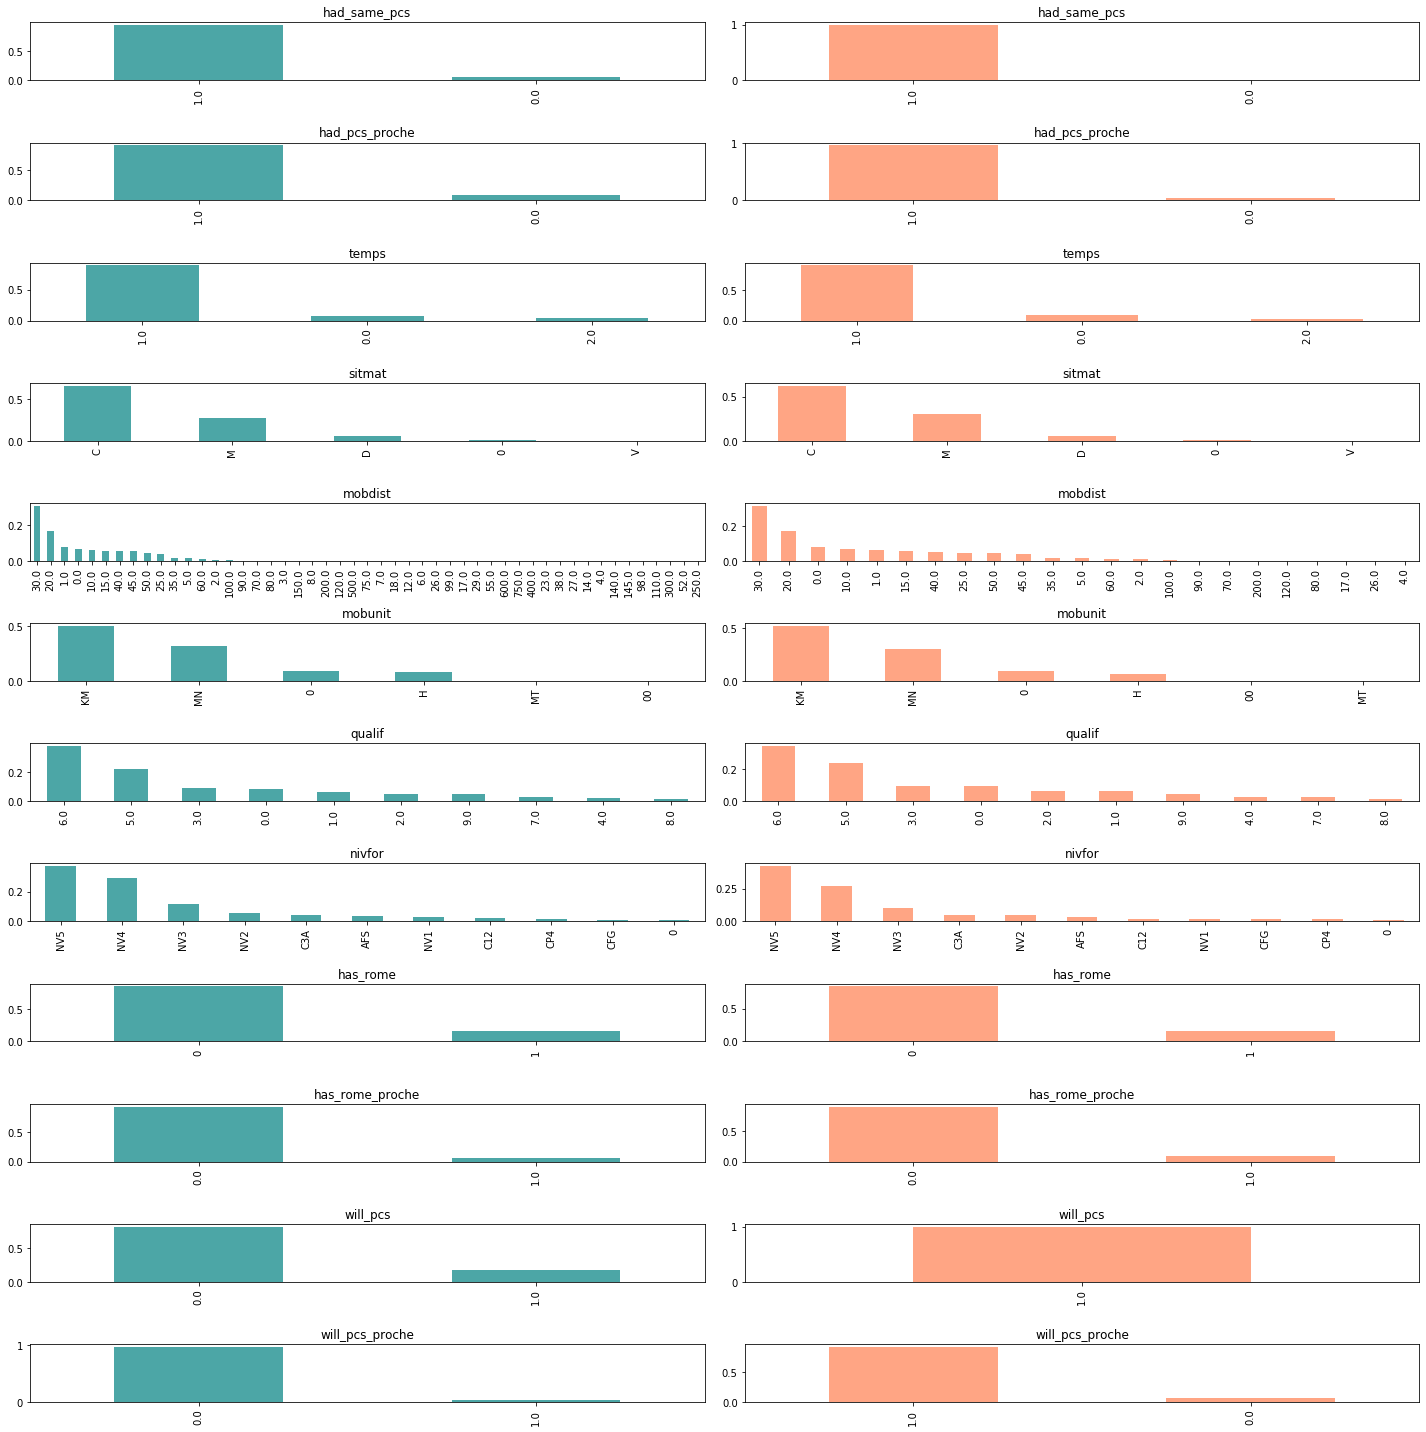

In [21]:
bar_plot_graph(df0, df1, categ_list, (20, 20))

In [22]:
cramer = pd.DataFrame(index=categ_list, columns=["cramer_v"])

# convert to categories type
for col in categ_list:
    df[col] = df[col].astype('category')
    cramer.loc[col, "cramer_v"] = cramers_corrected_stat(pd.crosstab(df.label, df[col]))

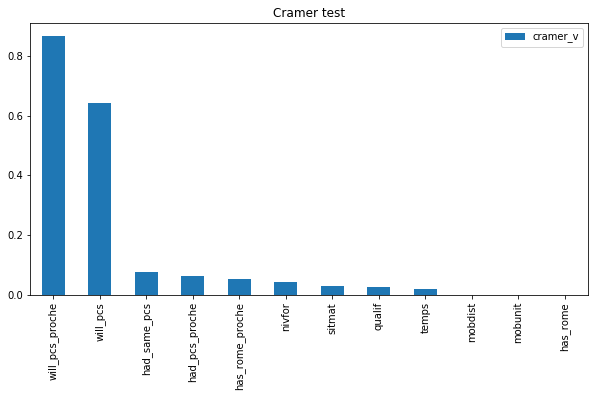

In [23]:
cramer.sort_values(by="cramer_v", ascending=False).plot(kind="bar", figsize=(10, 5))
plt.title('Cramer test')
plt.show()

In [49]:
def boxplot_graph(df1, df2, col_list, figsize):
    """Plot bar plot graph for a list of categorical columns in the dataframe.
    """
    ncol = 2
    nrow = len(col_list)
    _, axes = plt.subplots(nrow, ncol, figsize=figsize)
    k = 0

    for j in range(nrow):
        sns.boxplot(df1[col_list[k]], ax=axes[j, 0], color='teal')
        sns.boxplot(df2[col_list[k]], ax=axes[j, 1], color='coral')
        k = k+1
    plt.tight_layout()

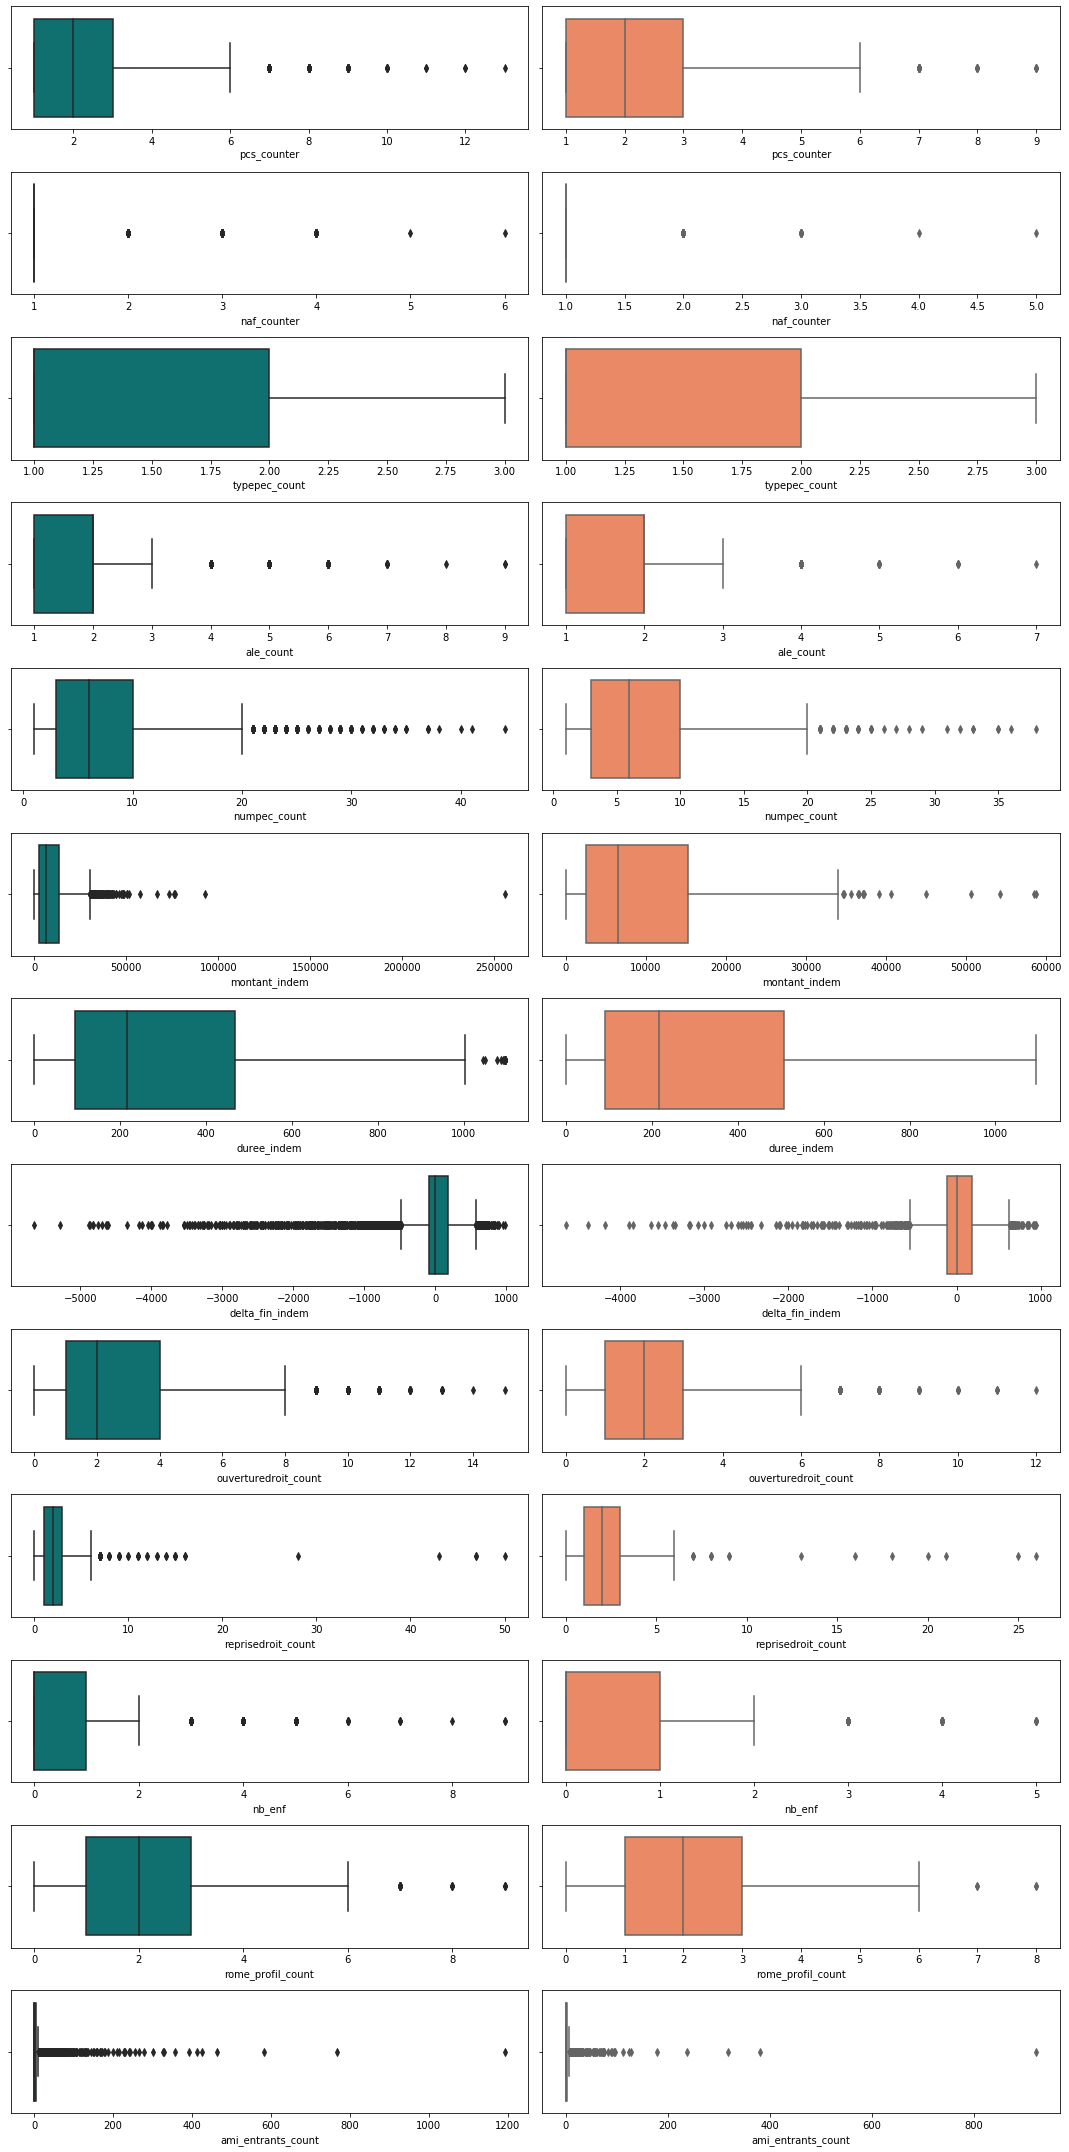

In [50]:
boxplot_graph(df0, df1, num_list, (15, 30))